<a href="https://colab.research.google.com/github/AayushSangani/ML/blob/master/ML_04_J040_270720.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 4**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sns.set_style('darkgrid')

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2)

**Exercise** **1**

In [ ]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [ ]:
df_can.drop(['AREA', 'Coverage', 'Type', 'REG', 'DEV'],axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region', 'DevName':'Development-status'}, inplace=True)
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)
years = range(1980,2014)
df_can

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985


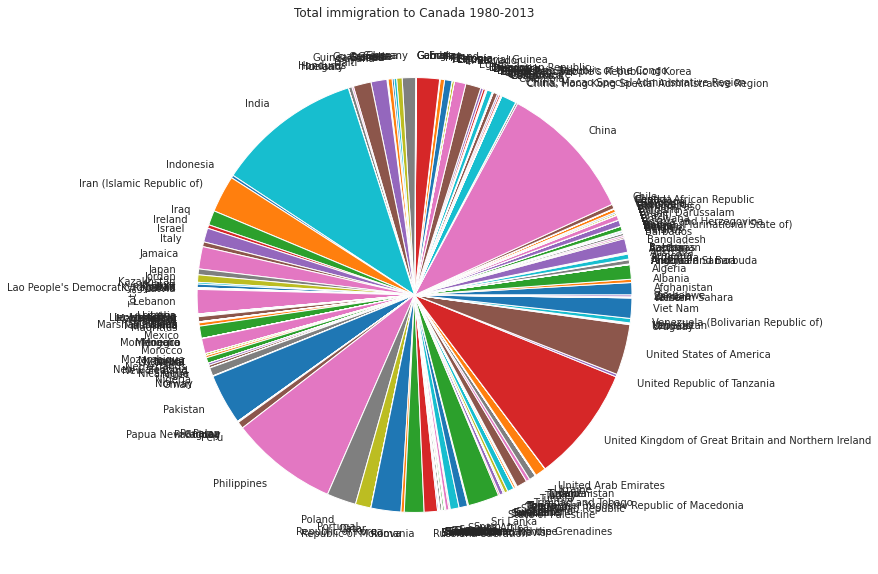

In [ ]:
df_can['Total'].plot(
    kind='pie',
    figsize=(10,10),
  )
plt.title("Total immigration to Canada 1980-2013")
plt.show()

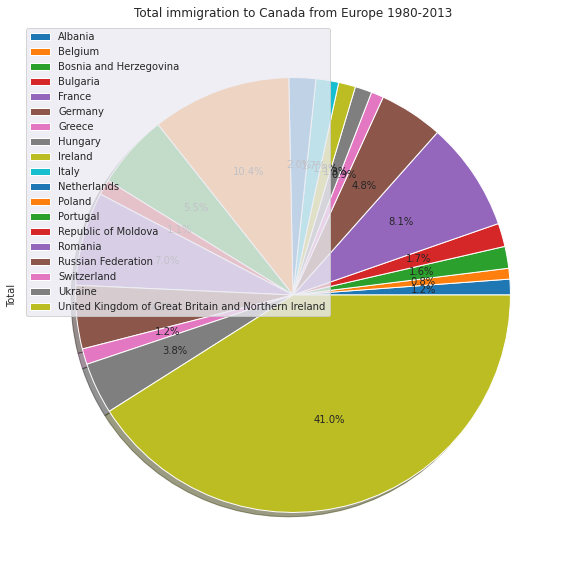

In [ ]:
dfnew2 = df_can[(df_can['Continent']=='Europe') & (df_can['Total']>10000)]

dfnew2['Total'].plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%',
    shadow=True,
    labels=None
  )
plt.title("Total immigration to Canada from Europe 1980-2013")
plt.legend(labels=dfnew2.index, loc="upper left")
plt.show()

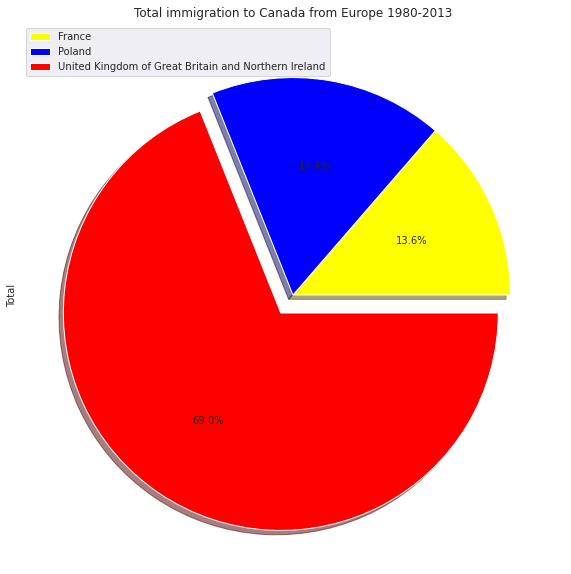

In [ ]:
dfnew3 = df_can[(df_can['Continent']=='Europe') & (df_can['Total']>100000)]

colors = ['yellow','blue','red']
explodes = [0,0,0.1]

dfnew3['Total'].plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colors,
    explode=explodes
  )
plt.title("Total immigration to Canada from Europe 1980-2013")
plt.legend(labels=dfnew3.index, loc="upper left")
plt.show()

**Assignment** 


1. By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.

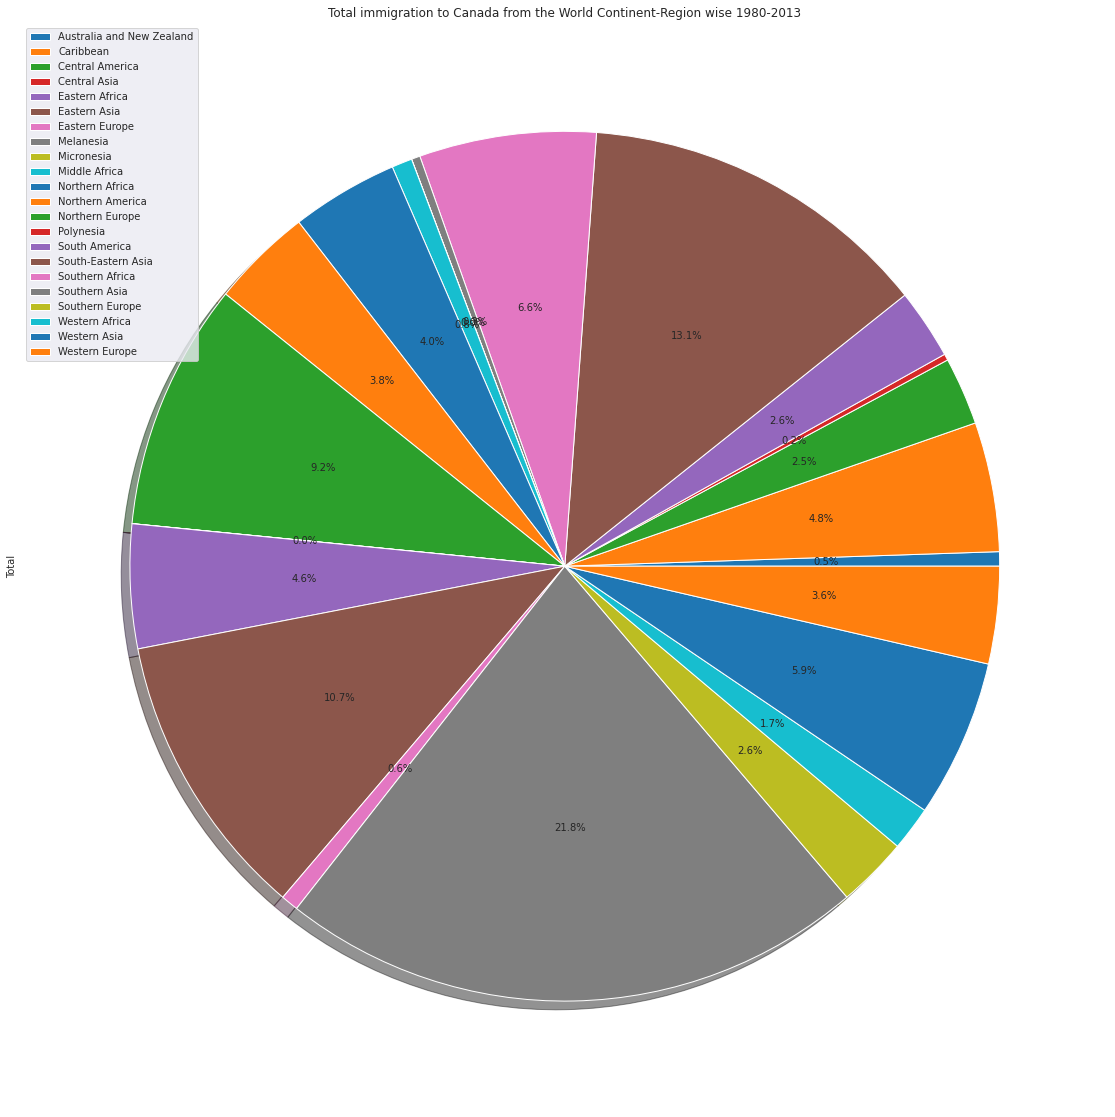

In [ ]:
dfnew4 = df_can.groupby('Continent-Region', axis='rows').sum()

dfnew4.head()
dfnew4['Total'].plot(
    kind='pie',
    figsize=(20, 20),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    startangle = 0,
  )
plt.title("Total immigration to Canada from the World Continent-Region wise 1980-2013")
plt.legend(labels=dfnew4.index, loc="upper left")
plt.show()

2. By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.

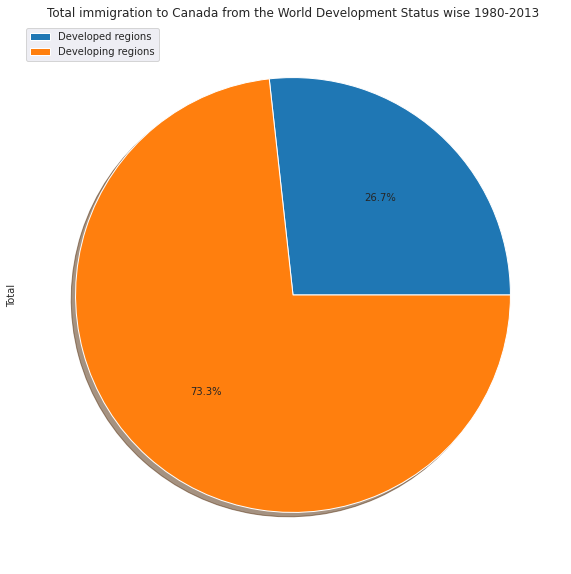

In [ ]:
dfnew4 = df_can.groupby('Development-status', axis='rows').sum()

dfnew4.head()
dfnew4['Total'].plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    startangle = 0,
  )
plt.title("Total immigration to Canada from the World Development Status wise 1980-2013")
plt.legend(labels=dfnew4.index, loc="upper left")
plt.show()

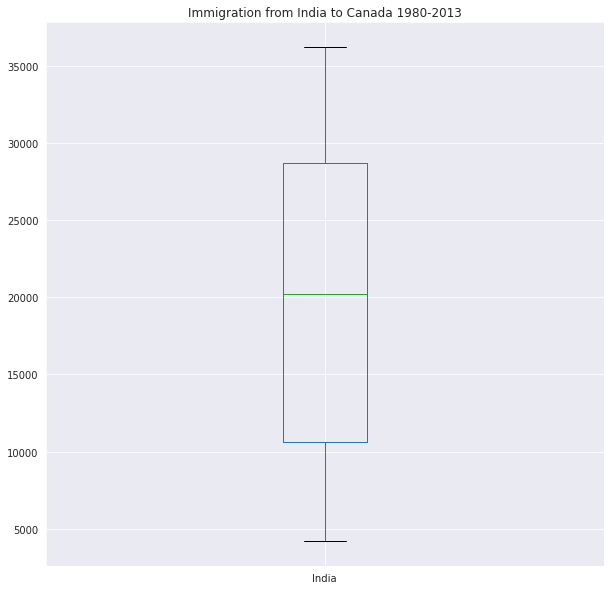

In [ ]:
df_can.head()

df_india = df_can.loc[['India'],years].transpose()
df_india.head()

df_india.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India to Canada 1980-2013")
plt.show()

In [ ]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


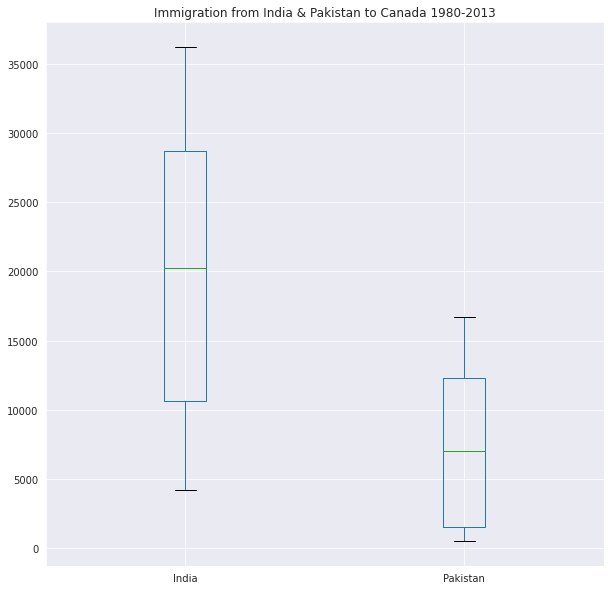

In [ ]:
df_indiapak = df_can.loc[['India','Pakistan'],years].transpose()
df_indiapak.head()

df_indiapak.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India & Pakistan to Canada 1980-2013")
plt.show()

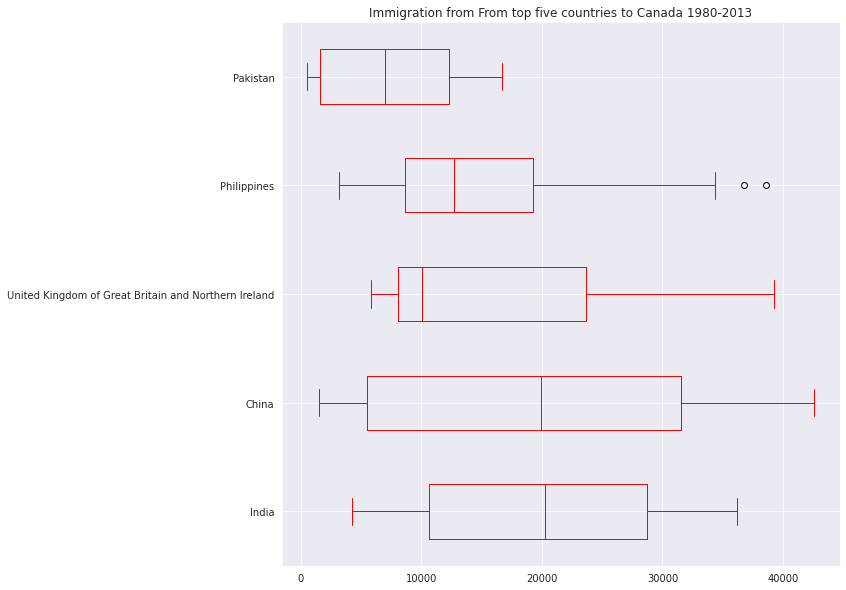

In [ ]:
df_can.sort_values(by='Total', ascending=False, inplace=True, axis='index')
dftop5 = df_can.head(5)
dftop5 = dftop5[years].transpose()
dfbottom5 = df_can.tail(5)
dfbottom5 = dfbottom5[years].transpose()


dftop5.plot(
    kind="box",
    figsize=(10,10),
    vert=False,
    color='red'
)
plt.title("Immigration from top 5 countries to Canada 1980-2013")
plt.show()

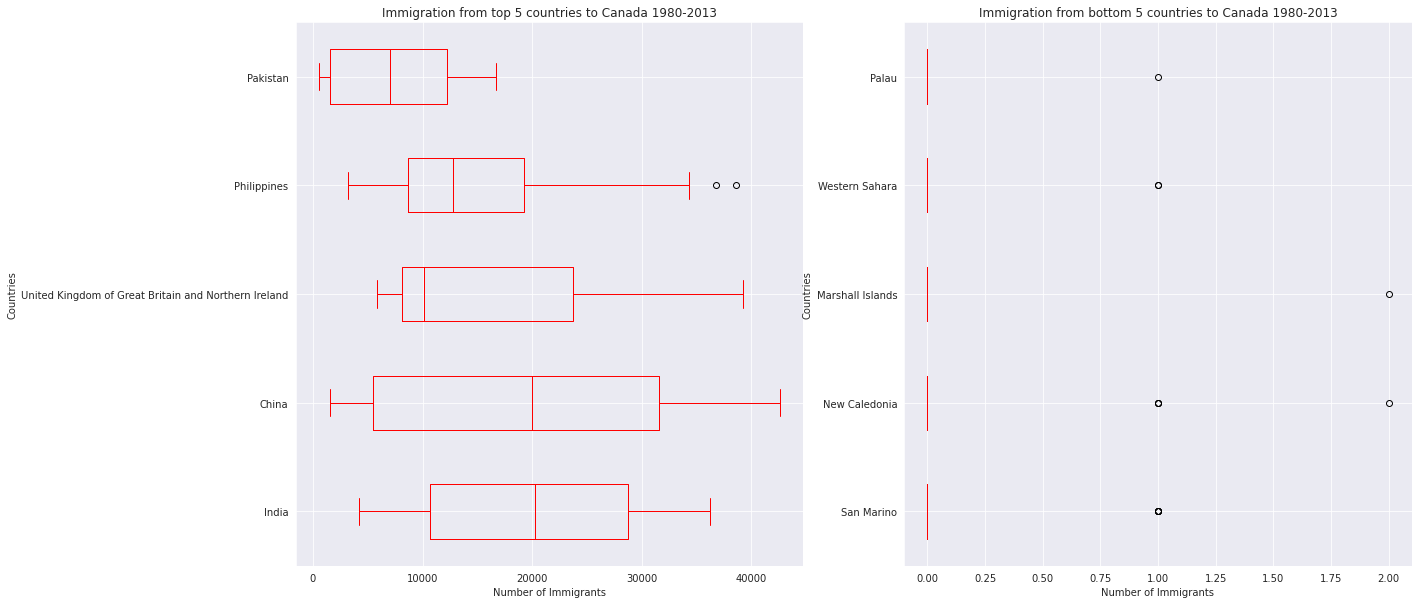

In [ ]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

dftop5.plot(kind="box",figsize=(20,10),vert=False,color='red', ax=ax0)
ax0.set_title("Immigration from top 5 countries to Canada 1980-2013")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")

dfbottom5.plot(kind="box",figsize=(20,10),vert=False,color='red', ax=ax1)
ax1.set_title("Immigration from bottom 5 countries to Canada 1980-2013")
ax1.set_xlabel("Number of Immigrants")
ax1.set_ylabel("Countries")

plt.show()

3. Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania.

In [ ]:
df_can.sort_values(by='Total', ascending=False, inplace=True, axis='index')

asia = df_can[df_can['Continent']=='Asia'].head(5)
asia = asia[years].transpose()

europe = df_can[df_can['Continent']=='Europe'].head(5)
europe = europe[years].transpose()

africa = df_can[df_can['Continent']=='Africa'].head(5)
africa = africa[years].transpose()

oceania = df_can[df_can['Continent']=='Oceania'].head(5)
oceania = oceania[years].transpose()

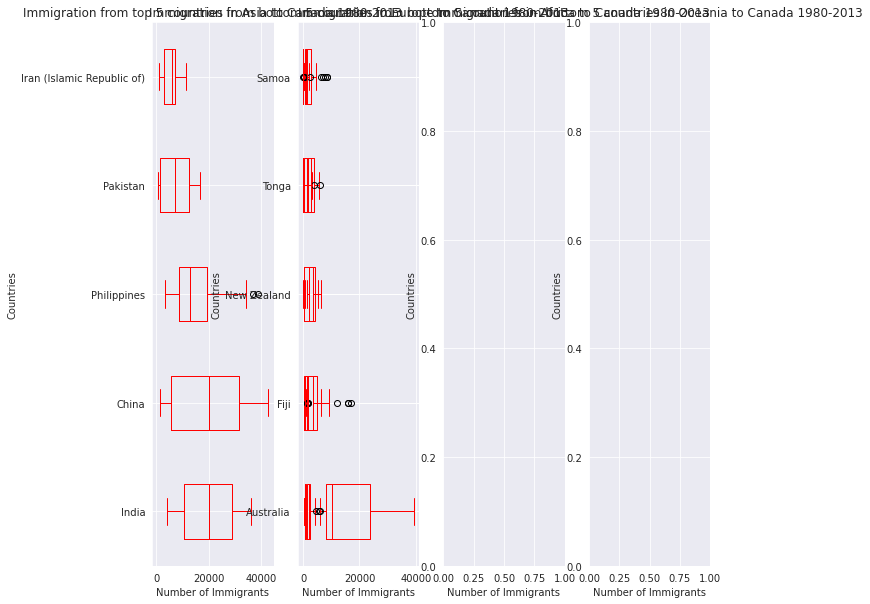

In [ ]:
fig = plt.figure()

ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

asia.plot(kind="box",figsize=(10,10),vert=False,color='red', ax=ax0)
ax0.set_title("Immigration from top 5 countries in Asia to Canada 1980-2013")
ax0.set_xlabel("Number of Immigrants")
ax0.set_ylabel("Countries")

europe.plot(kind="box",figsize=(10,10),vert=False,color='red', ax=ax1)
ax1.set_title("Immigration from bottom 5 countries in Europe to Canada 1980-2013")
ax1.set_xlabel("Number of Immigrants")
ax1.set_ylabel("Countries")

africa.plot(kind="box",figsize=(10,10),vert=False,color='red', ax=ax1)
ax2.set_title("Immigration from bottom 5 countries in Africa to Canada 1980-2013")
ax2.set_xlabel("Number of Immigrants")
ax2.set_ylabel("Countries")

oceania.plot(kind="box",figsize=(10,10),vert=False,color='red', ax=ax1)
ax3.set_title("Immigration from bottom 5 countries in Oceania to Canada 1980-2013")
ax3.set_xlabel("Number of Immigrants")
ax3.set_ylabel("Countries")

plt.show()

In [ ]:
dfindia = df_can.loc[['India'], years].transpose().describe()

Q1 = 10343.0
Q3= 28572.0
IQR=Q3-Q1
Outlier1 = Q3+1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)

55915.5
-17000.5


In [ ]:
dfindia = df_can.loc[['India'], years]
dfindia = dfindia[2013].describe()
q1 = dfindia.loc['75%']
q1

33087.0

4. Identify the countries which are outliers based on total migration.

In [ ]:
for country in df_can.index:
  df = df_can.loc[[country], years].transpose().describe()
  Q1 = df.loc['25%']
  Q3 = df.loc['75%']
  IQR=Q3-Q1
  Outlier1 = Q3+1.5*IQR
  Outlier2 = Q1 - 1.5*IQR
  print(Outlier1)
  print(Outlier2)

Country
India    55792.125
dtype: float64
Country
India   -16454.875
dtype: float64
Country
China    70652.125
dtype: float64
Country
China   -33570.875
dtype: float64
Country
United Kingdom of Great Britain and Northern Ireland    47095.375
dtype: float64
Country
United Kingdom of Great Britain and Northern Ireland   -15315.625
dtype: float64
Country
Philippines    35128.0
dtype: float64
Country
Philippines   -7216.0
dtype: float64
Country
Pakistan    28298.875
dtype: float64
Country
Pakistan   -14474.125
dtype: float64
Country
United States of America    12313.5
dtype: float64
Country
United States of America    1693.5
dtype: float64
Country
Iran (Islamic Republic of)    12745.0
dtype: float64
Country
Iran (Islamic Republic of)   -2751.0
dtype: float64
Country
Sri Lanka    9307.625
dtype: float64
Country
Sri Lanka   -1163.375
dtype: float64
Country
Republic of Korea    11054.25
dtype: float64
Country
Republic of Korea   -2787.75
dtype: float64
Country
Poland    9923.125
dtype: float6

In [ ]:
years = range(1980,2014)

dfscat = pd.DataFrame(df_can[years].sum(axis='index'))
dfscat.reset_index(inplace=True)
dfscat.columns = ['Year', 'Total']
dfscat.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


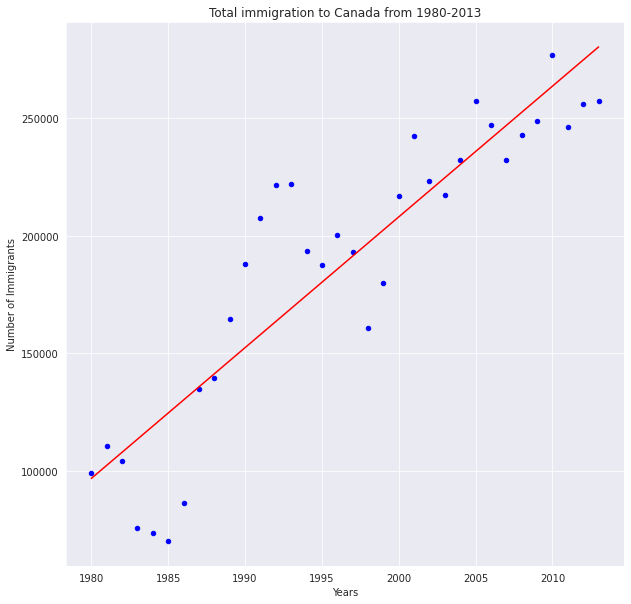

In [ ]:
x=dfscat['Year']
y=dfscat['Total']
fit=np.polyfit(x,y,1)

dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='blue'
)
plt.title("Total immigration to Canada from 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

plt.plot(x, fit[0]*x+fit[1], color='red')

plt.show()

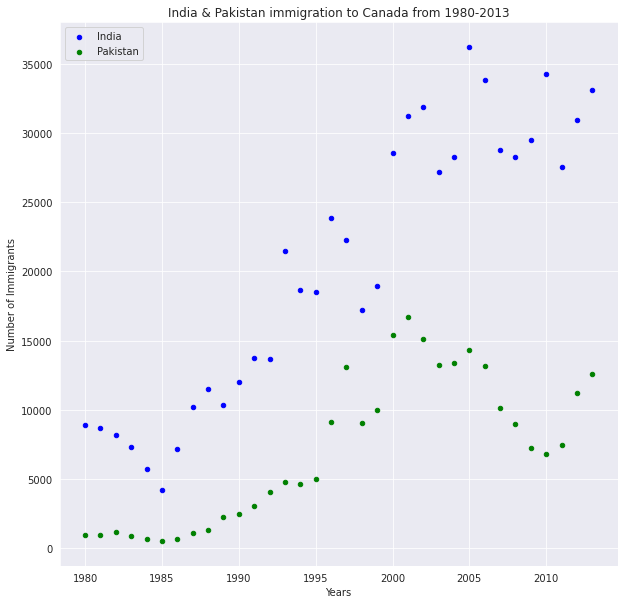

In [ ]:
dfindopak = df_can.loc[['India','Pakistan'], years].transpose()
dfindopak.reset_index(inplace=True)
dfindopak.index.name = 'index'
dfindopak.rename(columns={'index':'Year'}, inplace=True)

ax0 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='India',
    color='blue'
)

ax1 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Pakistan',
    color='green',
    ax=ax0
)

ax0.set_title("India & Pakistan immigration to Canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of Immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

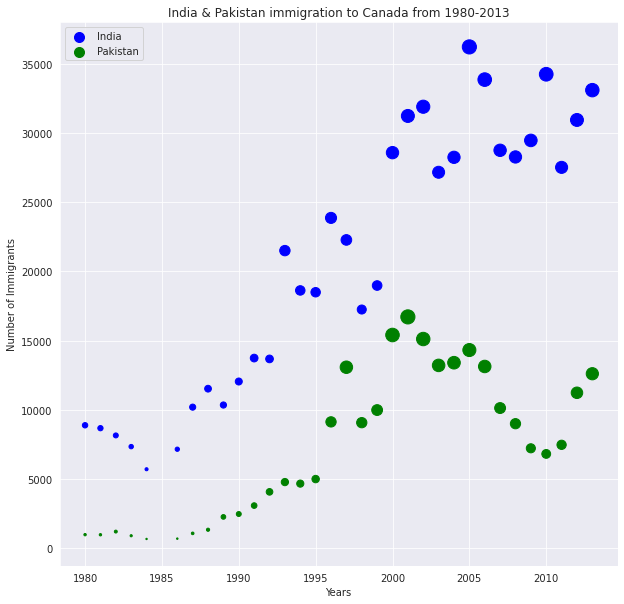

In [ ]:
normindia = (dfindopak['India'] - dfindopak['India'].min()) / (dfindopak['India'].max() - dfindopak['India'].min())
normpak = (dfindopak['Pakistan'] - dfindopak['Pakistan'].min()) / (dfindopak['Pakistan'].max() - dfindopak['Pakistan'].min())

ax0 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='India',
    color='blue',
    s = normindia*200
)

ax1 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Pakistan',
    color='green',
    ax=ax0,
    s = normpak*200
)

ax0.set_title("India & Pakistan immigration to Canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of Immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

5. Plot the bubble plot for Norway, Denmark, Finland.

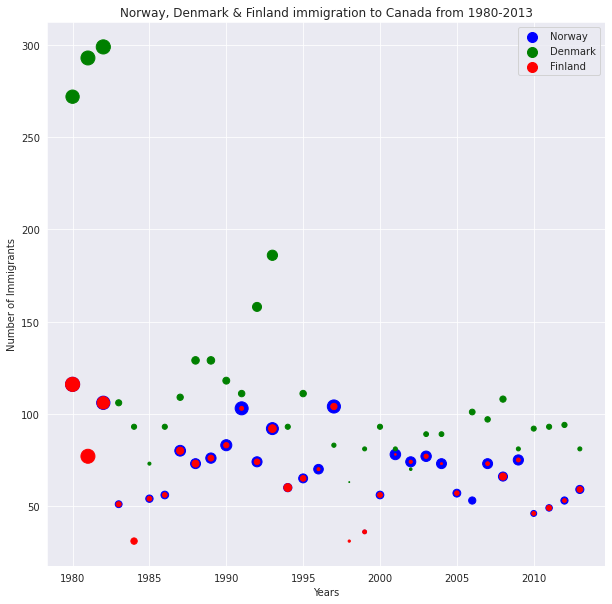

In [ ]:
df = df_can.loc[['Norway','Denmark', 'Finland'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)

normnor = (df['Norway'] - df['Norway'].min()) / (df['Norway'].max() - df['Norway'].min())
normden = (df['Denmark'] - df['Denmark'].min()) / (df['Denmark'].max() - df['Denmark'].min())
normfin = (df['Finland'] - df['Finland'].min()) / (df['Finland'].max() - df['Finland'].min())

ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue',
    s = normnor*200
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0,
    s = normden*200
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='red',
    ax=ax0,
    s = normfin*200
)

ax0.set_title("Norway, Denmark & Finland immigration to Canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of Immigrants")
ax0.legend(['Norway', 'Denmark', 'Finland'], loc='upper right')

**Excercise** **2**

**Assignment for Norway, Denmark & Sweden:**

Scatter Plot

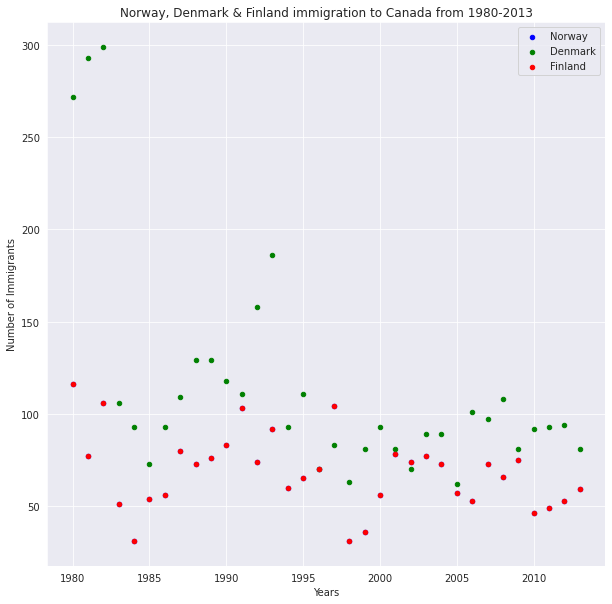

In [ ]:
df = df_can.loc[['Norway','Denmark', 'Finland'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)

ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue'
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='red',
    ax=ax0
)

ax0.set_title("Norway, Denmark & Finland immigration to Canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of Immigrants")
ax0.legend(['Norway', 'Denmark', 'Finland'], loc='upper right')

2. Bubble Plot

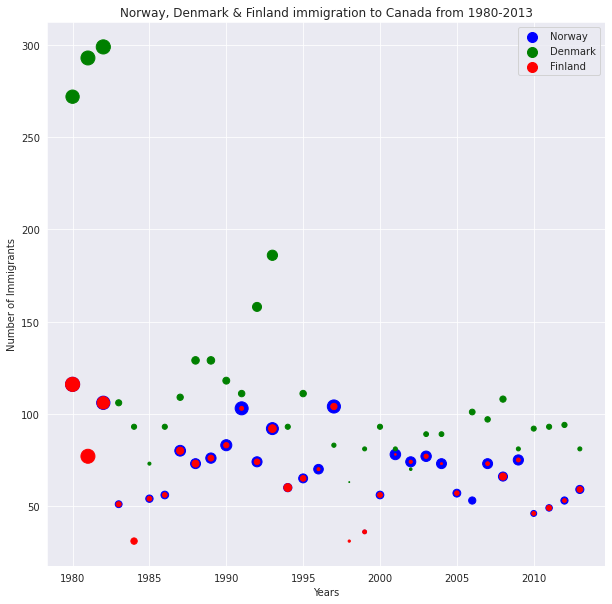

In [ ]:
df = df_can.loc[['Norway','Denmark', 'Finland'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)

normnor = (df['Norway'] - df['Norway'].min()) / (df['Norway'].max() - df['Norway'].min())
normden = (df['Denmark'] - df['Denmark'].min()) / (df['Denmark'].max() - df['Denmark'].min())
normfin = (df['Finland'] - df['Finland'].min()) / (df['Finland'].max() - df['Finland'].min())

ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue',
    s = normnor*200
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0,
    s = normden*200
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='red',
    ax=ax0,
    s = normfin*200
)

ax0.set_title("Norway, Denmark & Finland immigration to Canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of Immigrants")
ax0.legend(['Norway', 'Denmark', 'Finland'], loc='upper right')

3. Boxplot

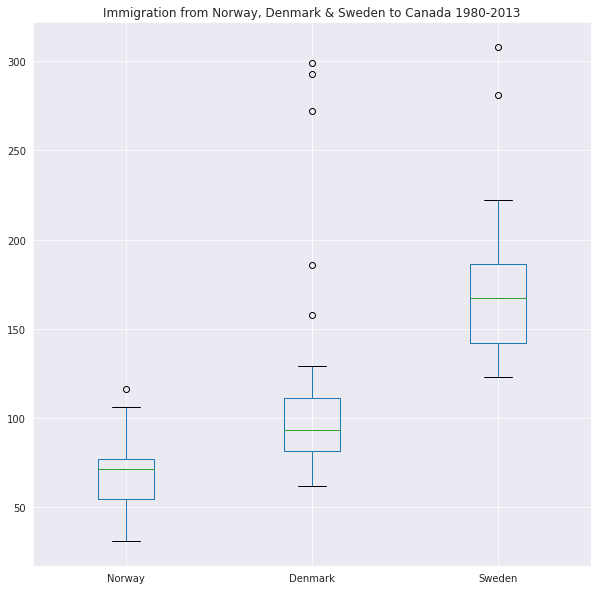

In [ ]:
df_nds = df_can.loc[['Norway','Denmark', 'Sweden'],years].transpose()
df_nds.head()

df_nds.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from Norway, Denmark & Sweden to Canada 1980-2013")
plt.show()

5. Check for outliers in years 2013.

In [ ]:
for country in df_can.index:
  print(country)
  df = df_can.loc[[country], years].transpose()
  df = df.loc[2013].describe()
  Q1 = df.loc['25%']
  Q3 = df.loc['75%']
  IQR=Q3-Q1
  Outlier1 = Q3+1.5*IQR
  Outlier2 = Q1 - 1.5*IQR
  print(Outlier1)
  print(Outlier2)
  print('\n')

India
33087.0
33087.0


China
34129.0
34129.0


United Kingdom of Great Britain and Northern Ireland
5827.0
5827.0


Philippines
29544.0
29544.0


Pakistan
12603.0
12603.0


United States of America
8501.0
8501.0


Iran (Islamic Republic of)
11291.0
11291.0


Sri Lanka
2394.0
2394.0


Republic of Korea
4509.0
4509.0


Poland
852.0
852.0


Lebanon
2172.0
2172.0


France
5623.0
5623.0


Jamaica
2479.0
2479.0


Viet Nam
2112.0
2112.0


Romania
1512.0
1512.0


Haiti
4152.0
4152.0


Guyana
656.0
656.0


Portugal
630.0
630.0


Egypt
4165.0
4165.0


Morocco
3261.0
3261.0


Colombia
3631.0
3631.0


Iraq
4918.0
4918.0


Algeria
4331.0
4331.0


Israel
1945.0
1945.0


Bangladesh
3789.0
3789.0


Germany
1217.0
1217.0


Russian Federation
2466.0
2466.0


Mexico
3996.0
3996.0


Afghanistan
2004.0
2004.0


El Salvador
639.0
639.0


Ukraine
2487.0
2487.0


Trinidad and Tobago
427.0
427.0


Somalia
2028.0
2028.0


South Africa
1240.0
1240.0


Nigeria
4172.0
4172.0


Jordan
1255.0
1255.0


Ethiopia
1606

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# Check for latest version of Matplotlib.
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # Compute the proportion of each category with respect to the total.
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # Compute the total number of tiles.
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles: ', total_num_tiles)
    
    # Compute the number of tiles for each catagory.
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # Print out the number of tiles per category.
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # Initialize the waffle chart as an empty matrix.
    waffle_chart = np.zeros((height, width))

    # Define indices to loop through the waffle chart.
    category_index = 0
    tile_index = 0

    # Populate the waffle chart.
    for col in range(width):
        for row in range(height):
            tile_index += 1

    # If the number of tiles populated for the current category is equal to its corresponding allocated tiles, then
            if tile_index > sum(tiles_per_category[0:category_index]):
                # proceed to the next category.
                category_index += 1       
            
            # Set the class value to an integer, which increases with class.
            waffle_chart[row, col] = category_index
    
    # Instantiate a new figure object.
    fig = plt.figure()

    # Use matshow to display the waffle chart.
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # Get the axis.
    ax = plt.gca()

    # Set minor ticks.
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # Add gridlines based on minor ticks.
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # Compute the cumulative sum of individual categories to match the color schemes between the chart & legend.
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # Create legend.
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # Add legend to the chart.
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [ ]:
# Create a new dataframe for these 3 countries.
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866


Total number of tiles:  400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

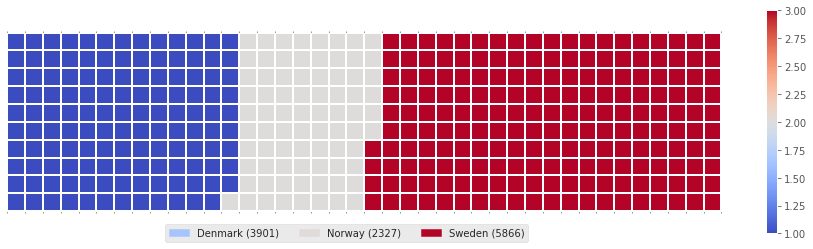

In [ ]:
width = 40 # width of the chart
height = 10 # height of the chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of the categories
colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

In [ ]:
# Install wordcloud.
!conda install -c conda-forge wordcloud==1.4.1 --yes

# Import the package and its set of stopwords.
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# Download the file and save as alice_novel.txt.
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# Open the file and read it into a variable alice_novel.
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


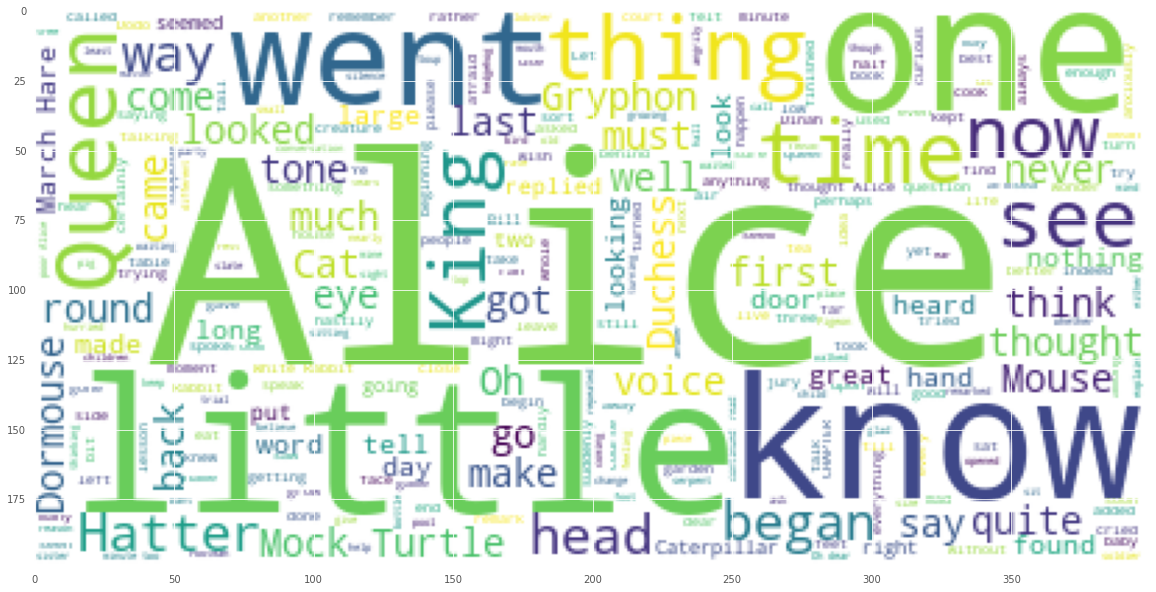

In [ ]:
# Remove redundant or unwanted or stop words.

stopwords = set(STOPWORDS)
stopwords.add("said")

alice_novel_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords=stopwords
)

# Display wordcloud.
alice_novel_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.imshow(alice_novel_wc)
plt.show()

In [ ]:
import folium

In [ ]:
map1 = folium.Map()
map1

In [ ]:
# mexico
lat=23.6345
long=-102.5528
map3 = folium.Map(location=[lat, long], zoom_start=5)
map3

In [ ]:
lat=37.1
long=-122
map4 = folium.Map(location=[lat, long], zoom_start=5, tiles='Stamen Terrain')
map4

In [ ]:
lat=37.1
long=-122
map3 = folium.Map(location=[lat, long], zoom_start=5, tiles='Stamen Toner')
map3

In [ ]:
# Add information to the maps.
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')
df_incidents.head()
df_incidents.shape

Dataset downloaded and read into a pandas dataframe!


(150500, 13)

In [ ]:
df1 = df_incidents.iloc[0:100,:]
lat = 37.77
long = -122.42

map2 = folium.Map(location=[lat, long], zoom_start=12)
map2

In [ ]:
# Create a dataset.
df1 = df_incidents.iloc[0:100,:]

# Create a map.
lat = 37.77
long = -122.42
map2 = folium.Map(location=[lat, long], zoom_start=12)

# Step 1: Records have to be stored in a data structure.
incidents = folium.map.FeatureGroup()

# Step 2: Type of markers to use
for lat, long, labs in zip(df1.Y, df1.X, df1.Category):
   incidents.add_child(
       folium.CircleMarker(
           [lat, long],
           radius=5,
           color='yellow',
           fill=True,  
           popup=labs        
       ).add_to(incidents)
   )

# Step 3: Show the map.
map2.add_child(incidents)

In [ ]:
# Create a dataset.
df1 = df_incidents.iloc[0:100,:]

# Create a map.
lat = 37.77
long = -122.42
map2 = folium.Map(location=[lat, long], zoom_start=12)

# Step 2: Type of markers to use
for lat, long, labs in zip(df1.Y, df1.X, df1.Category):
       folium.CircleMarker(
           [lat, long],
           radius=5,
           color='yellow',
           fill=True,  
           popup=labs        
       ).add_to(map2)

# Step 3: Show the map.
map2

In [ ]:
# Create a dataset.
df1 = df_incidents.iloc[0:100,:]

# Create a map.
lat = 37.77
long = -122.42
map2 = folium.Map(location=[lat, long], zoom_start=12)

# Cluster object
from folium import plugins
clusts = plugins.MarkerCluster().add_to(map2)

#Step 2: Type of markers to use
for lat, long, labs in zip(df1.Y, df1.X, df1.Category):
       folium.CircleMarker(
           [lat, long],
           radius=5,
           color='yellow',
           fill=True,  
           popup=labs        
       ).add_to(clusts)

# Step 3: Show the map.
map2

6. Plot for Mumbai city crimes (markers to map).

In [ ]:
# Create a dataset.
df1 = df_incidents.iloc[0:100,:]

# Create a map.
lat = 19.0760
long = 72.8777
map2 = folium.Map(location=[lat, long], zoom_start=12)

# Step 2: Type of markers to use
for lat, long, labs in zip(df1.Y, df1.X, df1.Category):
       folium.CircleMarker(
           [lat, long],
           radius=5,
           color='yellow',
           fill=True,  
           popup=labs        
       ).add_to(map2)
# Step 3: Show the map.
map2

7. Immigration to India (Cloropleth maps)

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

df_can.drop(['AREA','Type','Coverage','DEV','REG'], inplace=True, axis='columns')
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent-Region','DevName':'Development-status'}, inplace=True)
df_can['Total'] = df_can.sum(axis='columns')

years = range(1980, 2014)

df_can.head()

Data downloaded and read into a dataframe!


,Country,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
# Download countries geojson file.
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
world_geo = r'world_countries.json' # geojson file

# Create a plain world map.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map

In [ ]:
world_map.choropleth(
    geo_data = world_geo,
    data = df_can,
    columns = ['Country', 'Total'],
    legend_name = 'Immigration to Canada',
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2
)

world_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
scale = np.linspace(df_can['Total'].min(), df_can['Total'].max(), 6, dtype=int)
scale = scale.tolist()
scale[-1] = scale[-1]+1

world_map = folium.Map(location=[0,0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data = world_geo,
    data = df_can,
    columns = ['Country', 'Total'],
    legend_name = 'Immigration to Canada',
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale= scale,
    reset=True
)

world_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
